In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

/home/zander/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
# read npy file
X_sol_intermediate = np.load('X_sol_intermediate.npy')

In [27]:
# read npz file
data = np.load('solution0.npz')
X_sol_intermediate = data['X_sol_intermediate']
U_sol = data['U_sol_intermediate']
inf_pr = data['info_pr']
inf_du = data['info_du']
obj = data['info_obj']

(107, 6, 21)


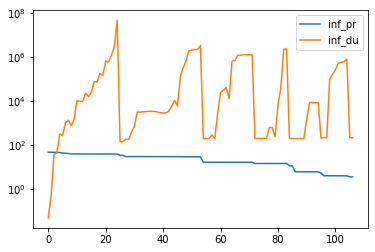

In [21]:
fig, ax = plt.subplots()

ax.plot(np.arange(len(inf_pr)), inf_pr, label="inf_pr")
ax.plot(np.arange(len(inf_du)), inf_du, label="inf_du")

ax.legend(loc="upper right")
ax.set_yscale("log")

107


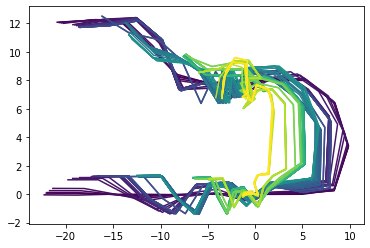

In [22]:
num_plots = len(X_sol_intermediate)
print(num_plots)

colors = cm.viridis(np.linspace(0, 1, num_plots))

for i, x in enumerate(X_sol_intermediate):
    plt.plot(x[0], x[1], color=colors[i], label=f'Plot {i+1}')
# plt.legend()

[3.15545867e-31 3.53813456e-02 6.69105780e-02 2.60269935e-01
 6.91988350e-01 6.23951337e+00 9.38062938e+00 1.89416632e+01
 4.42080842e+01 4.57563215e+01 4.59773800e+01 4.61647913e+01
 4.68838474e+01 4.88163056e+01 5.86848629e+01 5.91303245e+01
 5.97528652e+01 6.00930674e+01 6.20275154e+01 7.82792844e+01
 7.85011656e+01 7.86469572e+01 7.86915679e+01 7.88608397e+01
 7.87928532e+01 7.75122917e+01 7.75172705e+01 7.57229781e+01
 7.57094829e+01 7.56932584e+01 7.57217402e+01 7.57941674e+01
 7.55271759e+01 7.53594118e+01 7.49549114e+01 7.49419192e+01
 7.47303378e+01 7.42969125e+01 7.42137927e+01 7.41049311e+01
 7.43027241e+01 7.40323601e+01 7.39781356e+01 7.37657964e+01
 7.38366629e+01 7.45230166e+01 7.52293048e+01 7.85338814e+01
 8.17606664e+01 8.17889687e+01 8.17630547e+01 8.14933755e+01
 8.04147772e+01 7.98048500e+01 7.23688200e+01 7.22843191e+01
 7.22759297e+01 7.22490578e+01 7.21671312e+01 7.21464549e+01
 7.21254125e+01 7.18365619e+01 7.18309093e+01 7.17122866e+01
 7.16838059e+01 7.161901

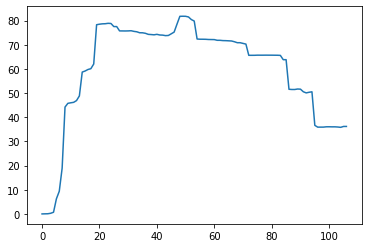

In [26]:
print(obj)
plt.plot(obj)

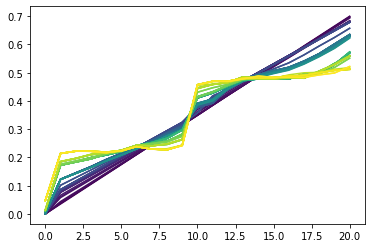

In [23]:
for i, x in enumerate(X_sol_intermediate):
    plt.plot(x[5], color=colors[i], label=f'Plot {i+1}')

In [6]:
# read npz file
data = np.load('solution.npz')
X_sol_intermediate = data['X_sol_intermediate']
U_sol = data['U_sol_intermediate']
inf_pr = data['info_pr']
inf_du = data['info_du']
obj = data['info_obj']

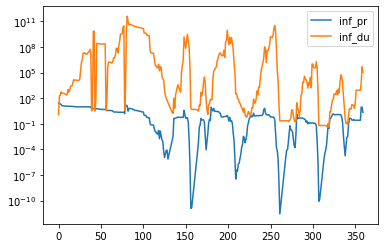

In [7]:
fig, ax = plt.subplots()

ax.plot(np.arange(len(inf_pr)), inf_pr, label="inf_pr")
ax.plot(np.arange(len(inf_du)), inf_du, label="inf_du")

ax.legend(loc="upper right")
ax.set_yscale("log")

360


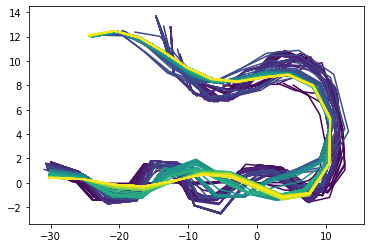

In [8]:
num_plots = len(X_sol_intermediate)
print(num_plots)

colors = cm.viridis(np.linspace(0, 1, num_plots))

for i, x in enumerate(X_sol_intermediate):
    plt.plot(x[0], x[1], color=colors[i], label=f'Plot {i+1}')
# plt.legend()

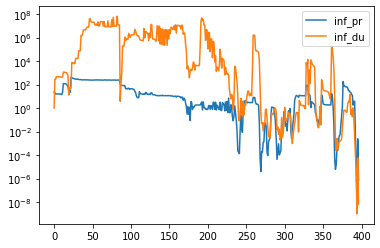

397


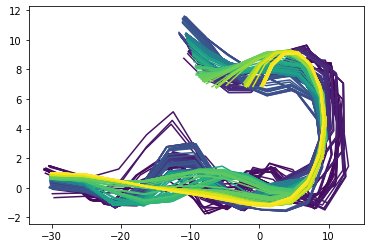

In [9]:
# read npz file
data = np.load('solution_circles.npz')
X_sol_intermediate = data['X_sol_intermediate']
U_sol = data['U_sol_intermediate']
inf_pr = data['info_pr']
inf_du = data['info_du']
obj = data['info_obj']

fig, ax = plt.subplots()

ax.plot(np.arange(len(inf_pr)), inf_pr, label="inf_pr")
ax.plot(np.arange(len(inf_du)), inf_du, label="inf_du")

ax.legend(loc="upper right")
ax.set_yscale("log")
plt.show()

num_plots = len(X_sol_intermediate)
print(num_plots)

colors = cm.viridis(np.linspace(0, 1, num_plots))

for i, x in enumerate(X_sol_intermediate):
    plt.plot(x[0], x[1], color=colors[i], label=f'Plot {i+1}')
# plt.legend()
plt.show()

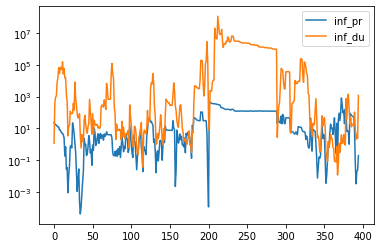

395


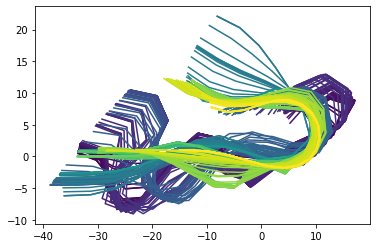

In [4]:
# read npz file
data = np.load('solution_halfspaces.npz')
X_sol_intermediate = data['X_sol_intermediate']
U_sol = data['U_sol_intermediate']
inf_pr = data['info_pr']
inf_du = data['info_du']
obj = data['info_obj']

fig, ax = plt.subplots()

ax.plot(np.arange(len(inf_pr)), inf_pr, label="inf_pr")
ax.plot(np.arange(len(inf_du)), inf_du, label="inf_du")

ax.legend(loc="upper right")
ax.set_yscale("log")
plt.show()

num_plots = len(X_sol_intermediate)
print(num_plots)

colors = cm.viridis(np.linspace(0, 1, num_plots))

for i, x in enumerate(X_sol_intermediate):
    plt.plot(x[0], x[1], color=colors[i], label=f'Plot {i+1}')
# plt.legend()
plt.show()

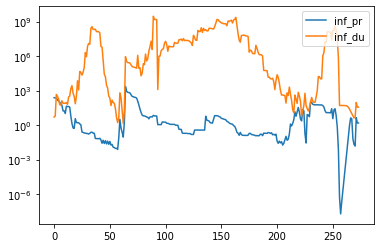

274


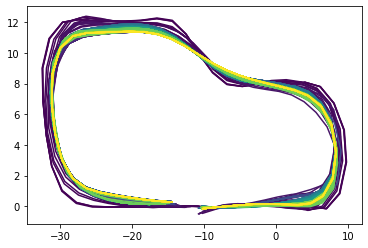

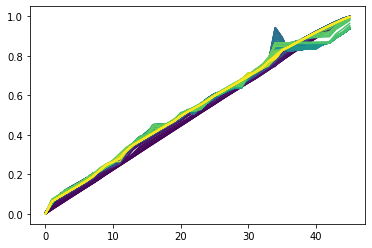

In [2]:
# read npz file
data = np.load('solution.npz')
X_sol_intermediate = data['X_sol_intermediate']
U_sol = data['U_sol_intermediate']
inf_pr = data['info_pr']
inf_du = data['info_du']
obj = data['info_obj']

fig, ax = plt.subplots()

ax.plot(np.arange(len(inf_pr)), inf_pr, label="inf_pr")
ax.plot(np.arange(len(inf_du)), inf_du, label="inf_du")

ax.legend(loc="upper right")
ax.set_yscale("log")
plt.show()

num_plots = len(X_sol_intermediate)
print(num_plots)

colors = cm.viridis(np.linspace(0, 1, num_plots))
# temp_colors = cm.viridis(np.linspace(0, 1, 10))
for i, x in enumerate(X_sol_intermediate[:]):
    plt.plot(x[0], x[1], color=colors[i], label=f'Plot {i+1}')
    
# plt.legend()
plt.show()

for i, x in enumerate(X_sol_intermediate):
    plt.plot(x[5], color=colors[i], label=f'Plot {i+1}')
plt.show()

In [ ]:
def get_reference_track(dt, N, actual_speed, debug=False):
        self.path_blf = transform_blf()

        if len(self.path_blf) == 0:
            return []

        # Find target points based on required velocity and maximum acceleration
        speed_target = 20
        max_acceleration = 2.0  # TODO: create param
        # calculate distances based on maximum acceleration and current speed
        distances = [
            (min(speed_target, actual_speed + dt * max_acceleration * i)) * i * dt
            for i in range(N)
        ]

        if self.change_index:
            self.closest_index = np.argmin(
                np.sum((self.path_blf - [0, 0]) ** 2, axis=1)
            )
        else:
            distances_temp = np.sum((self.path_blf - [0, 0]) ** 2, axis=1)
            # Add a large distance to all indices 20 further than self.closest_idnex
            # To avoid mistake at skidpad overlap
            distances_temp = np.where(
                abs(np.arange(len(distances_temp)) - self.closest_index) < 20,
                distances_temp,
                distances_temp + 1000,
            )
            self.closest_index = np.argmin(distances_temp)
        if debug:
            current_point = self.path_blf[self.closest_index]
            print(current_point)

        # Now calculate for each point the distance to the car along the path

        # Shift path so that closest point is at index 0
        shifted_path = np.roll(self.path_blf, -self.closest_index, axis=0)
        # Compute the distance between consecutive points
        diff = np.diff(shifted_path, axis=0)
        distances_cumsum = np.linalg.norm(diff, axis=1)

        # Append 0 and calculate cummulative sum
        distances_relative = np.append([0], np.cumsum(distances_cumsum))

        # Find points at specified distances
        reference_path = []
        for i in range(len(distances)):
            # Find first value in distances_relative that is greater than distance
            for j in range(len(distances_relative)):
                if distances_relative[j] < distances[i]:
                    continue
                elif distances_relative[j] == distances[i]:
                    # Just take point on path
                    scaling = 1
                elif distances_relative[j] > distances[i]:
                    # Required distances between two points so scale between them
                    scaling = 1 - np.abs(
                        (distances[i] - distances_relative[j])
                        / (distances_relative[j] - distances_relative[j - 1])
                    )

                reference_path.append(
                    shifted_path[j - 1]
                    + scaling * (shifted_path[j] - shifted_path[j - 1])
                )
                if debug:
                    print(
                        f"Point {j - 1} and {j} with scaling {scaling} and distance {distances[i]} and relative distance {distances_relative[j]} results in point {reference_path[-1]}"
                    )
                break

        return reference_path